### Simple model for detecting hand written numbers

In [310]:
import tensorflow
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as matlib
import numpy as np

In [299]:
(x_train, y_train), (x_test, y_test) = tfds.load(name="mnist", split=[tfds.Split.TRAIN, tfds.Split.TEST], batch_size=-1, as_supervised=True ) 


In [300]:
x_train = tfds.as_numpy(x_train).astype('float32')
x_test = tfds.as_numpy(x_test).astype('float32')
y_train = tfds.as_numpy(y_train).astype('float32')
y_test = tfds.as_numpy(y_test).astype('float32')


In [301]:
x_train /= 255.0
x_test /=255.0

In [302]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation=tensorflow.nn.relu, input_shape=(28, 28, 1)))

model.add(Conv2D(64, kernel_size=(3,3), activation=tensorflow.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation=tensorflow.nn.relu))
model.add(Dropout(0.5))

model.add(Dense(10, activation=tensorflow.nn.softmax))

In [303]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [304]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10


2022-10-08 20:07:32.725011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2129 - accuracy: 0.9351

2022-10-08 20:07:50.105753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 19s 37ms/step - loss: 0.2129 - accuracy: 0.9351 - val_loss: 0.0537 - val_accuracy: 0.9821
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0690 - accuracy: 0.9795 - val_loss: 0.0408 - val_accuracy: 0.9856
Epoch 3/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0293 - val_accuracy: 0.9908
Epoch 5/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0302 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.0277 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0260 - val_accuracy: 0.9919
Epo

In [305]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0269 - accuracy: 0.9922


[0.02693825028836727, 0.9921999573707581]

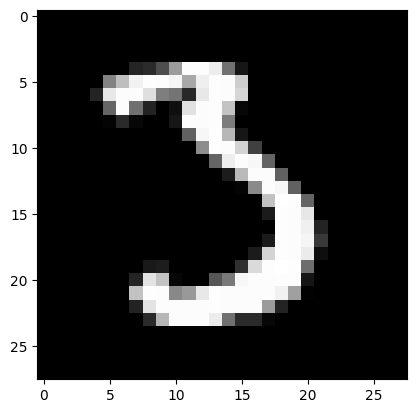

In [320]:
imageAsArray = x_test[22].reshape(28, 28);
matlib.imshow(imageAsArray, cmap='gray')
matlib.show()

In [321]:
valid_0 = x_test[22].reshape(1,28, 28, 1)
p = model.predict(valid_0)
p

1/1 [==============================] - 0s 29ms/step


array([[1.8306008e-09, 9.1805381e-09, 6.1771135e-07, 9.9998426e-01,
        2.7007680e-12, 1.4324953e-05, 3.1852253e-12, 1.4985364e-09,
        9.8528673e-08, 6.9872766e-07]], dtype=float32)

In [322]:
result = np.where(p == np.amax(p))
result

(array([0]), array([3]))